In [4]:
import json
import math
import os
from collections import defaultdict

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches, patheffects, text

# from google.colab import files
# import tensorflow as tf
# assert tf.__version__.startswith('2')
# from mediapipe_model_maker import object_detector

In [5]:
# !wget https://storage.googleapis.com/mediapipe-tasks/object_detector/android_figurine.zip
# !unzip android_figurine.zip
# train_dataset_path = "android_figurine/train"
# validation_dataset_path = "android_figurine/validation"

train_dataset_path = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train"
validation_dataset_path = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/validation"

with open(os.path.join(train_dataset_path, "labels.json"), "r") as f:
    labels_json = json.load(f)

for category_item in labels_json["categories"]:
    print(f"{category_item['id']}: {category_item['name']}")

0: background
1: card


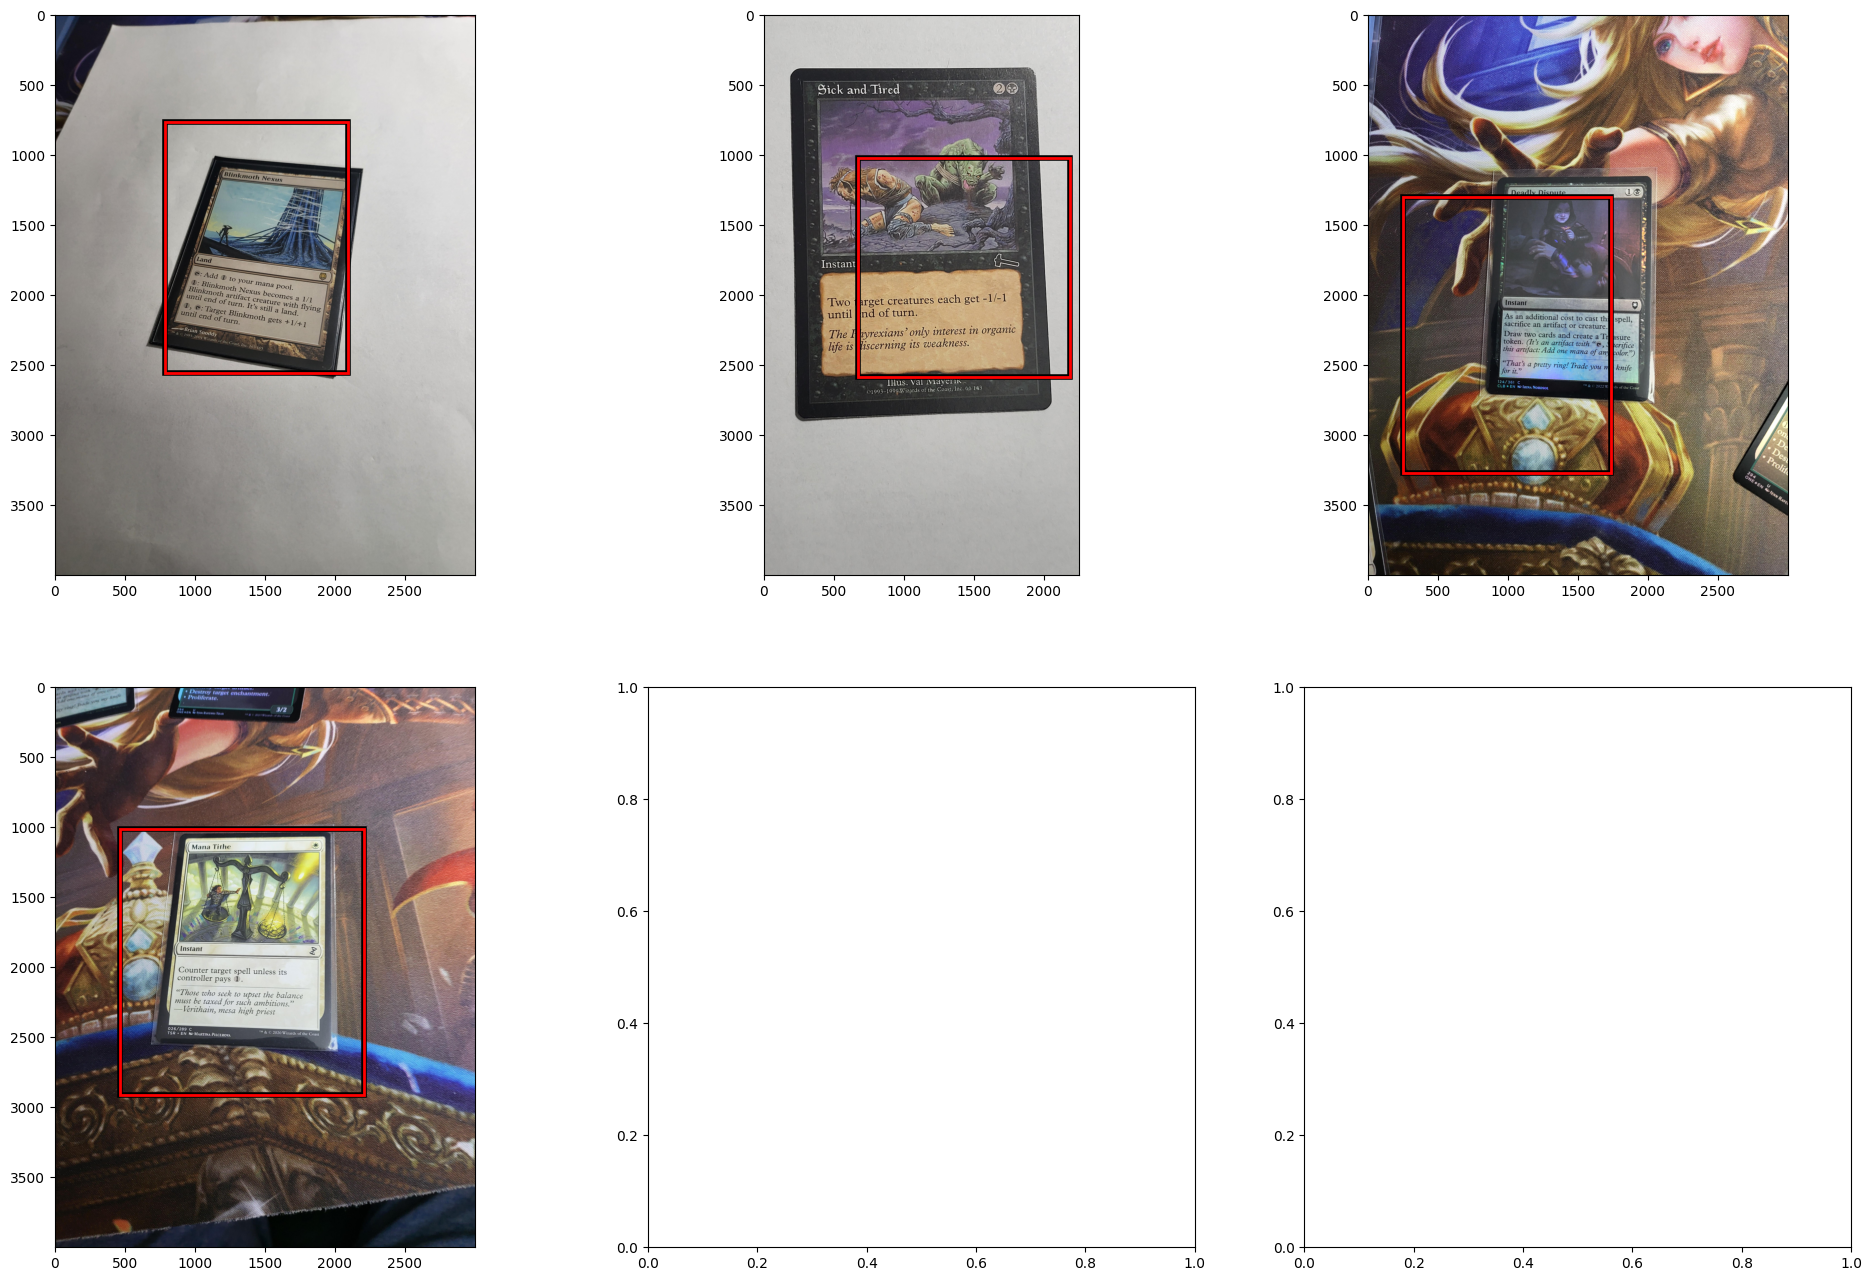

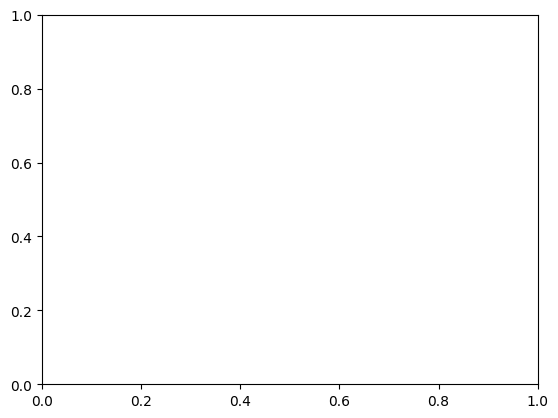

In [6]:
def urmum(max_examples=9):
    with open(os.path.join(train_dataset_path, "labels.json"), "r") as f:
        labels_json = json.load(f)

    images = labels_json["images"]
    cat_id_to_label = {item["id"]: item["name"] for item in labels_json["categories"]}

    image_annots = defaultdict(list)
    for annotation_obj in labels_json["annotations"]:
        image_id = annotation_obj["image_id"]
        # print(f"image_id: {image_id}, annotation_obj: {annotation_obj}")
        image_annots[image_id].append(annotation_obj)

    # aa = image_annots.items()
    # bb = list(aa)[:max_examples]

    n_rows = math.ceil(max_examples / 3)
    _, axs = plt.subplots(n_rows, 3, figsize=(24, n_rows * 8))  # 3 columns(2nd index), 8x8 for each image
    fig, ax = plt.subplots(1)

    for ind, (image_id, annotations_list) in enumerate(list(image_annots.items())[:max_examples]):
        ax = axs[ind // 3, ind % 3]  # ax: matplotlib.axes._axes.Axes
        # print(f"ind: {ind}, image_id: {image_id}, annotations_list: {annotations_list}, ax: {ax}")

        img = plt.imread(os.path.join(train_dataset_path, "images", images[image_id]["file_name"]))
        ax.imshow(img)

        for annotation in annotations_list:
            bbox = annotation["bbox"]
            patch = ax.add_patch(patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor="red", lw=2))
            patch.set_path_effects([patheffects.Stroke(linewidth=4, foreground="black"), patheffects.Normal()])

            # text = ax.text(bbox[0], (bbox[1] - img.shape[0] * 0.05), cat_id_to_label[annotation["category_id"]], verticalalignment="top", color="white", fontsize=10, weight="bold")
            # text = ax.text(bbox[0], (bbox[1] - img.shape[0] * 0.05), annotation[], verticalalignment="top", color="white", fontsize=10)
            # text.set_path_effects([patheffects.Stroke(linewidth=4, foreground="black"), patheffects.Normal()])

    plt.show()


urmum(4)
# visualize(train_dataset_path, 4)

In [ ]:
labels_json_path = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train/labels.json"
with open(labels_json_path, "r") as f:
    labels_json = json.load(f)

images_json = labels_json["images"]
annotations_json = labels_json["annotations"]
# categories_json = labels_json["categories"]

image_annotation_mapping = {}
for image in images_json:
    image_id = image["id"]
    image_annotation_mapping[image_id] = {
        "file_name": image["file_name"],
        "annotations": [],
        # "annotations": [annotation for annotation in annotations_json if annotation["image_id"] == image_id]
    }

    for annotation in annotations_json:
        if annotation["image_id"] == image_id:
            image_annotation_mapping[image_id]["annotations"].append(annotation)

# print(json.dumps(image_annotation_mapping, indent=4))

In [ ]:
for image_id, image in image_annotation_mapping.items():
    print(image_id, image)

    bboxes = [annotation["bbox"] for annotation in image_annotation_mapping[image_id]["annotations"]]
    # print(bboxes)

    image = plt.imread(f"/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train/images/img{image_id}.jpg", format="jpg")
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for bbox in bboxes:
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor="r", facecolor="none")
        ax.add_patch(rect)

    plt.savefig(f"/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/tmp/img{image_id}.jpg", format="jpg")
    plt.close()
    # plt.show()

In [ ]:
# import glob
# from PIL import Image, ExifTags

# # old_img_path = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train/images/img15.jpg"
# # new_img_path = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train/images/img15_new.jpg"
# # images_dir = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train/images"
# images_dir = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/validation/images"
# for filename in glob.glob(f"{images_dir}/*.jpg"):
#     print(f"filename: {filename}")

#     img = Image.open(filename)

#     orientation = None
#     for o in ExifTags.TAGS.keys():
#         if ExifTags.TAGS[o] == "Orientation":
#             orientation = o
#             break

#     if not orientation:
#         raise Exception("No orientation found")

#     exif = img._getexif()
#     if exif[orientation] == 3:
#         print("rotating 180")
#         img = img.rotate(180, expand=True)
#     elif exif[orientation] == 6:
#         print("rotating 270")
#         img = img.rotate(270, expand=True)
#     elif exif[orientation] == 8:
#         print("rotating 90")
#         img = img.rotate(90, expand=True)
#     else:
#         print("no rotation needed")

#     img.save(filename)